In [1]:
!pip install scikit-learn matplotlib pandas



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
#loading predefined dataset IRIS for classification
iris = datasets.load_iris()                 #built in dataset
x =iris.data                                #features:shape
y = iris.target

print("X shape",x.shape) 
print("y shape", y.shape)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

X shape (150, 4)
y shape (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [9]:
#putting data into data frames so the visibility is easy
df = pd.DataFrame(x, columns = iris.feature_names)
df['species'] = y

df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


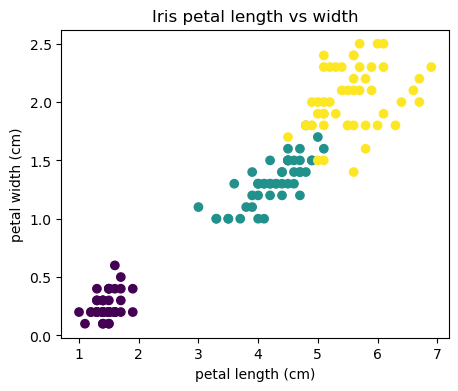

In [13]:
plt.figure(figsize=(5,4))
plt.scatter(df['petal length (cm)'],
            df['petal width (cm)'],
            c= df['species'])
        
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Iris petal length vs width')
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
x,y,
test_size= 0.2, # 20% test
random_state = 42 #for reproducibility
)

print("Train shape", x_train.shape, y_train.shape)
print("Test shape", x_test.shape, y_test.shape)

Train shape (120, 4) (120,)
Test shape (30, 4) (30,)


In [17]:
knn = KNeighborsClassifier(n_neighbors=5) # k =5 neighbors
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", acc)
print("True labels: ", y_test)
print("Predicted label: ", y_pred)

Accuracy on test set: 1.0
True labels:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted label:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [20]:
sample = np.array([[5.0, 3.5, 1.3 , 0.3]])

pred_label = knn.predict(sample)[0]
pred_name = iris.target_names[pred_label]
print("predicted species:", pred_name)


predicted species: setosa


In [21]:
for k in[1 , 3 , 5 , 7,9]:
    model =KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    y_pred_k = model.predict(x_test)
    print("k= ", k, "accuracy = ", accuracy_score(y_test, y_pred_k))

k=  1 accuracy =  1.0
k=  3 accuracy =  1.0
k=  5 accuracy =  1.0
k=  7 accuracy =  0.9666666666666667
k=  9 accuracy =  1.0


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree =DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print("Decision tree Accuracy:" ,accuracy_score(y_test , y_pred_tree))

Decision tree Accuracy: 1.0
